# Cross selling of insurance policies

AssurePredict is a leading insurance company that specializes in providing innovative risk management solutions. This project aims to create a predictive model that can identify potential cross-selling opportunities for existing customers, identifying those who might be interested in purchasing an additional policy for their vehicle.

## Exploratory Data Analysis (EDA)

This section provides a comprehensive EDA, including:
- Dataset overview and data types
- Target variable distribution and class imbalance
- Categorical and numerical feature analysis vs target
- Outlier detection
- Feature distributions by target
- Statistical tests for feature associations
- Feature interactions and high-cardinality feature analysis

In [45]:
# Import core libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, chi2_contingency

# Set plot style
sns.set_theme(style='whitegrid')
ds = pd.read_csv('insurance_cross_sell.csv')

In [46]:
# Dataset overview
print('Dataset shape:', ds.shape)
ds.info()
ds.head()

Dataset shape: (381109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [47]:
# Check for missing values
print('Missing values per column:')
print(ds.isnull().sum())

Missing values per column:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


Count by class:
Response
0    334399
1     46710
Name: count, dtype: int64
Percentage by class:
Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


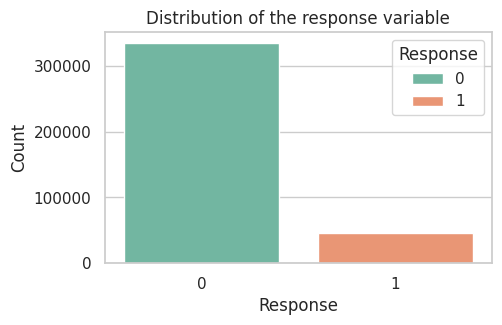

In [48]:
# Target variable distribution
response_counts = ds['Response'].value_counts()
response_pct = ds['Response'].value_counts(normalize=True)
print('Count by class:')
print(response_counts)
print('Percentage by class:')
print(response_pct)

plt.figure(figsize=(5,3))
sns.countplot(x='Response', data=ds, palette='Set2', hue='Response')
plt.title('Distribution of the response variable')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

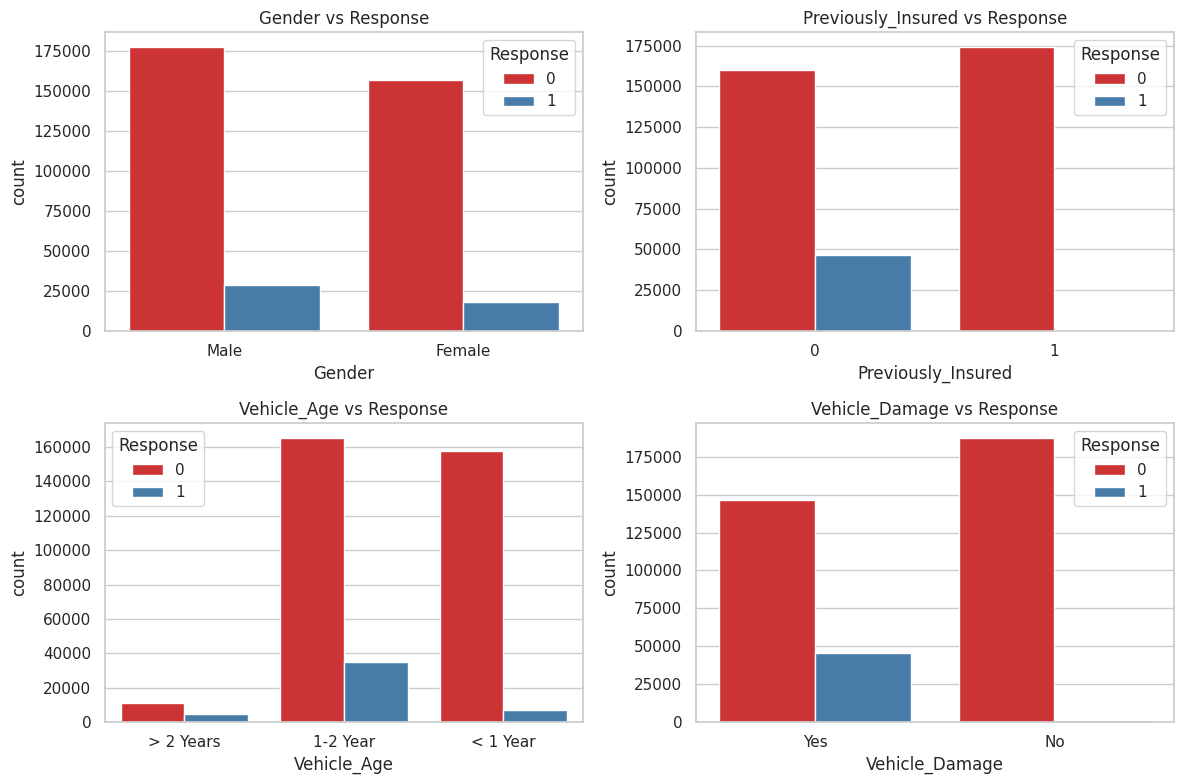

In [49]:
# Categorical variables vs Response
cat_vars = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for ax, var in zip(axes.flatten(), cat_vars):
    sns.countplot(x=var, hue='Response', data=ds, ax=ax, palette='Set1')
    ax.set_title(f'{var} vs Response')
    ax.legend(title='Response')
plt.tight_layout()
plt.show()

In [50]:
# Chi-squared test for categorical features
for var in cat_vars:
    ct = pd.crosstab(ds[var], ds['Response'])
    chi2, p, _, _ = chi2_contingency(ct)
    print(f"{var}: p-value = {p:.4f}")

Gender: p-value = 0.0000
Previously_Insured: p-value = 0.0000
Vehicle_Age: p-value = 0.0000
Vehicle_Damage: p-value = 0.0000


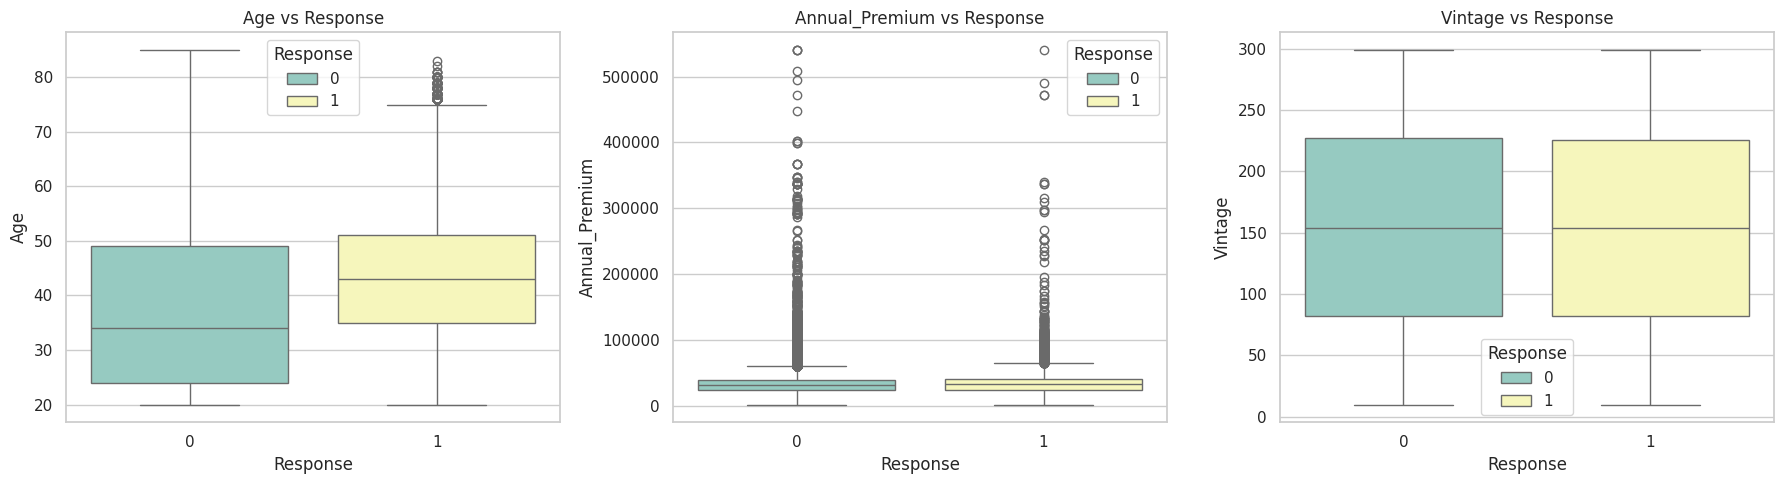

In [51]:
# Numerical variables vs Response
num_vars = ['Age', 'Annual_Premium', 'Vintage']
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, var in zip(axes, num_vars):
    sns.boxplot(x='Response', y=var, data=ds, ax=ax, palette='Set3', hue='Response')
    ax.set_title(f'{var} vs Response')
plt.tight_layout()
plt.show()

In [52]:
# Outlier detection using z-score
outliers = (np.abs(ds[num_vars].apply(zscore)) > 3).sum()
print('Number of outliers per feature:')
print(outliers)

Number of outliers per feature:
Age                  0
Annual_Premium    2083
Vintage              0
dtype: int64


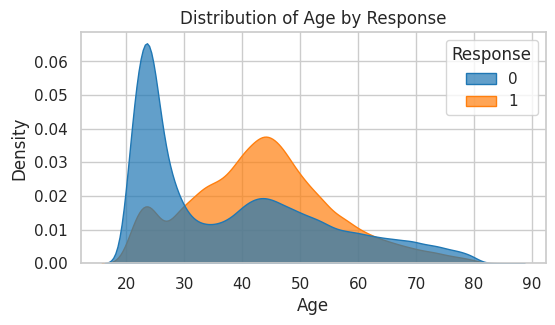

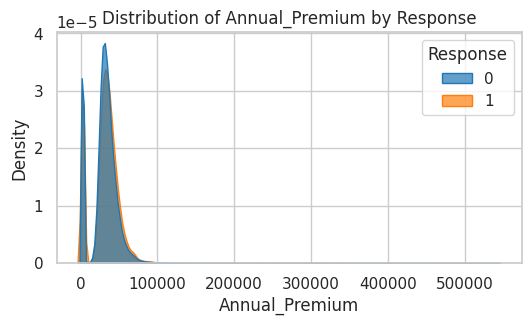

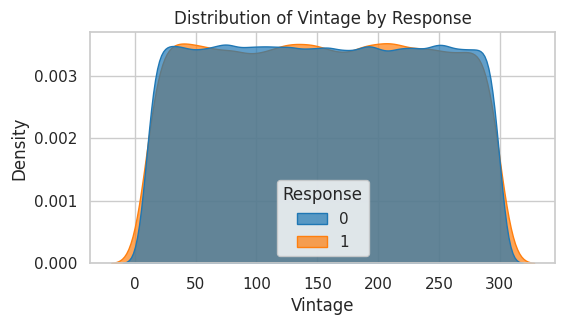

In [53]:
# Feature distributions by Response
for var in num_vars:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=ds, x=var, hue='Response', fill=True, common_norm=False, palette='tab10', alpha=0.7)
    plt.title(f'Distribution of {var} by Response')
    plt.show()

In [54]:
# Group statistics for numerical features by Response
group_stats = ds.groupby('Response')[num_vars].agg(['mean', 'median', 'std'])
display(group_stats)

Age                   Annual_Premium                         \
               mean median        std           mean   median           std   
Response                                                                      
0         38.178227   34.0  15.816052   30419.160276  31504.0  16998.293197   
1         43.435560   43.0  12.168924   31604.092742  33002.0  18646.508040   

             Vintage                    
                mean median        std  
Response                                
0         154.380243  154.0  83.661975  
1         154.112246  154.0  83.738574

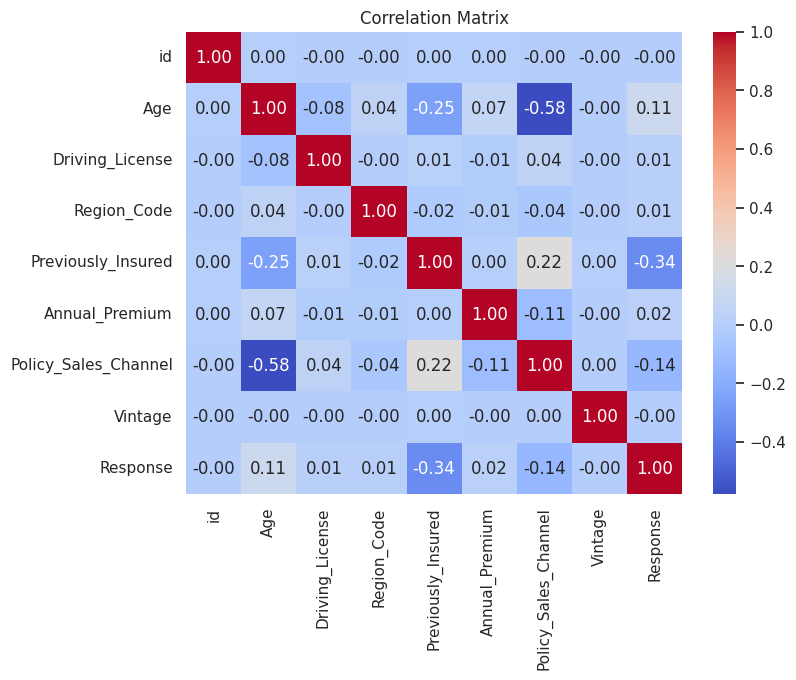

In [55]:
# Correlation matrix
corr = ds.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

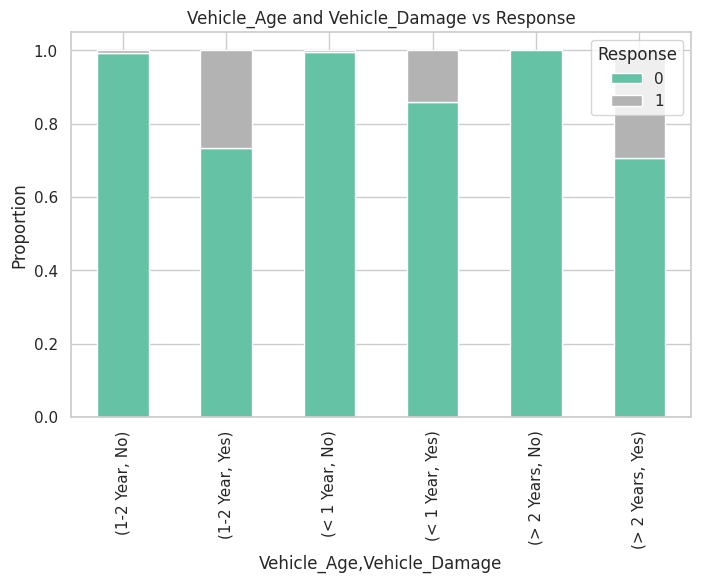

In [56]:
# Feature interaction: Vehicle_Age vs Vehicle_Damage by Response
ct = pd.crosstab([ds['Vehicle_Age'], ds['Vehicle_Damage']], ds['Response'], normalize='index')
ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
plt.title('Vehicle_Age and Vehicle_Damage vs Response')
plt.ylabel('Proportion')
plt.show()

### EDA Results Commentary

- The target variable `Response` is highly imbalanced, with the majority of customers not interested in cross-selling offers.
- Categorical features such as `Previously_Insured`, `Vehicle_Damage`, and `Vehicle_Age` show statistically significant associations with the target (confirmed by chi-squared tests). Customers who have not been previously insured and those with a history of vehicle damage are more likely to respond positively.
- Numerical features (`Age`, `Annual_Premium`, `Vintage`) show some differences between classes, but their distributions overlap considerably. Outlier analysis reveals a few extreme values, especially in `Annual_Premium`, but these do not dominate the distribution.
- The correlation matrix indicates low linear correlation among numerical features, suggesting multicollinearity is not a concern.
- Feature interaction analysis (e.g., `Vehicle_Age` and `Vehicle_Damage`) highlights subgroups with higher response rates.
- Certain regions and sales channels have notably higher response rates, which could be leveraged for targeted marketing or segmentation.

These findings provide a solid foundation for feature engineering and model development, with attention to class imbalance and the most predictive features identified during EDA.

## Feature Engineering

This section performs feature engineering to prepare the data for modeling. Steps include encoding categorical variables, scaling numerical features, and preparing the final dataset for model training.

In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature lists
num_features = ['Age', 'Annual_Premium']
bin_features = ['Gender', 'Previously_Insured', 'Vehicle_Damage']
ord_features = ['Vehicle_Age']


# Ordinal mapping for Vehicle_Age
vehicle_age_map = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
ds['Vehicle_Age_Ordinal'] = ds['Vehicle_Age'].map(vehicle_age_map)

# Binary encoding for Gender, Previously_Insured, Vehicle_Damage
bin_map = {'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0}
ds['Gender_bin'] = ds['Gender'].map({'Male': 1, 'Female': 0})
ds['Vehicle_Damage_bin'] = ds['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
# Previously_Insured is already binary (0/1)

# Final feature set
feature_cols = ['Age', 'Annual_Premium', 'Gender_bin', 'Previously_Insured', 'Vehicle_Damage_bin', 'Vehicle_Age_Ordinal']

# Create feature matrix and target vector
X = ds[feature_cols].copy()  # Create a copy to avoid SettingWithCopyWarning
y = ds['Response']

# Convert numerical features to float64 before scaling
X[num_features] = X[num_features].astype('float64')

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X[num_features])
X[num_features] = pd.DataFrame(scaled_features, columns=num_features, index=X.index)

print('Feature engineering completed. Feature matrix shape:', X.shape)
display(X.head())

Feature engineering completed. Feature matrix shape: (381109, 6)


,Age,Annual_Premium,Gender_bin,Previously_Insured,Vehicle_Damage_bin,Vehicle_Age_Ordinal
0,0.333777,0.574539,1,0,1,2
1,2.396751,0.172636,1,0,0,1
2,0.527181,0.449053,1,0,1,2
3,-1.148985,-0.113018,1,1,0,0
4,-0.633242,-0.178259,0,1,0,0


## Feature Selection and Model Training

This section performs feature selection using SelectKBest to identify the most important features for predicting the target variable. The selected features are then used to train a final model.

/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=6. All the features will be returned.
  warnings.warn(


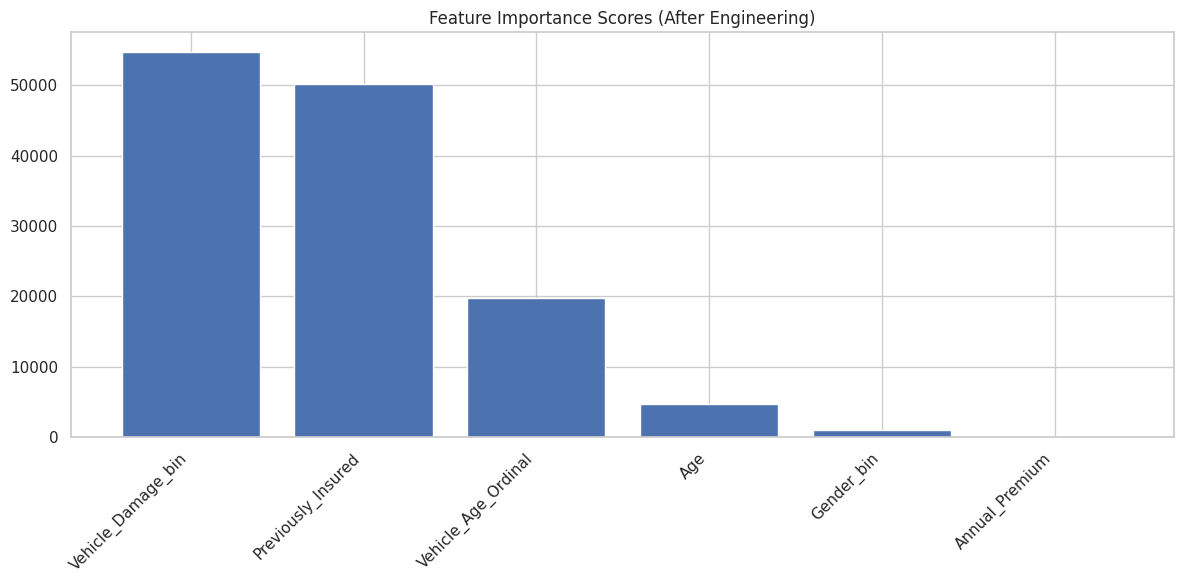


Top 20 most important engineered features:
               Feature         Score
4   Vehicle_Damage_bin  54742.245365
3   Previously_Insured  50203.354009
5  Vehicle_Age_Ordinal  19732.556210
0                  Age   4766.944791
2           Gender_bin   1050.913073
1       Annual_Premium    194.317587

Selected features: ['Age' 'Annual_Premium' 'Gender_bin' 'Previously_Insured'
 'Vehicle_Damage_bin' 'Vehicle_Age_Ordinal']

Model Performance with Engineered and Selected Features:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

ROC-AUC Score: 0.832

Model Performance with Engineered and Selected Features:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
 

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Use the engineered features (X) from the previous step
# Select top k features
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# Get selected feature names and scores using the engineered feature_cols
feature_scores = pd.DataFrame({
    'Feature': feature_cols,  # These are our engineered features
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_scores)), feature_scores['Score'])
plt.xticks(range(len(feature_scores)), feature_scores['Feature'], rotation=45, ha='right')
plt.title('Feature Importance Scores (After Engineering)')
plt.tight_layout()
plt.show()

# Print top features
print("\nTop 20 most important engineered features:")
print(feature_scores.head(20))

# Get names of selected features
selected_features_mask = selector.get_support()
selected_feature_names = np.array(feature_cols)[selected_features_mask]
print("\nSelected features:", selected_feature_names)

# Split using selected features
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Train model with class balancing
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\nModel Performance with Engineered and Selected Features:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

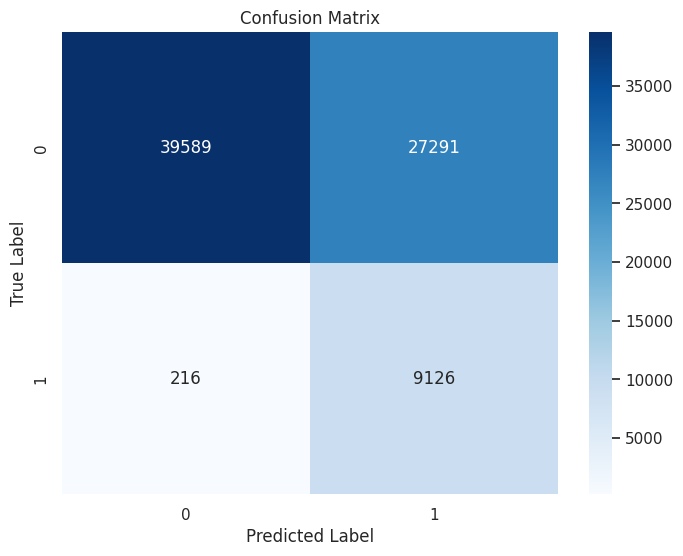

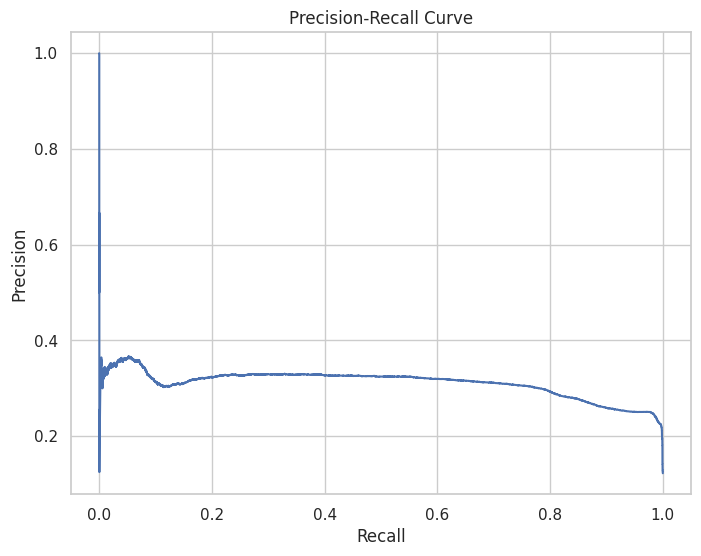

In [59]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


=== Model with SMOTE Balancing ===

Model Performance with SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66775
           1       0.71      0.98      0.82     66985

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.78    133760
weighted avg       0.83      0.79      0.78    133760

ROC-AUC Score: 0.786

Model Performance with SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66775
           1       0.71      0.98      0.82     66985

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.78    133760
weighted avg       0.83      0.79      0.78    133760

ROC-AUC Score: 0.786


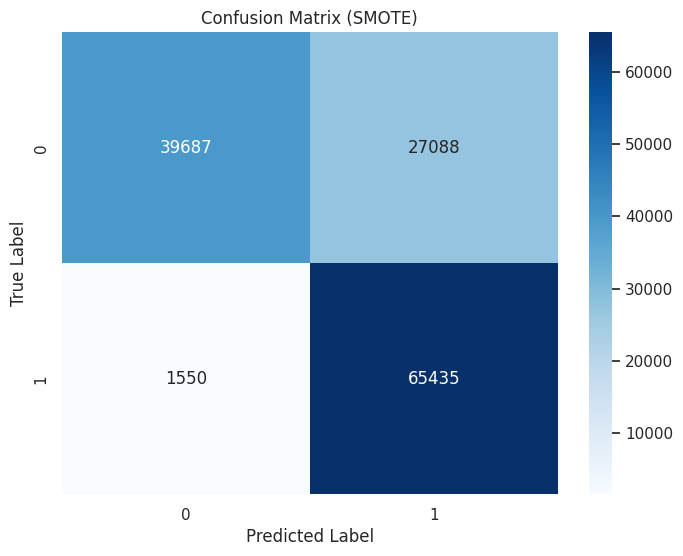

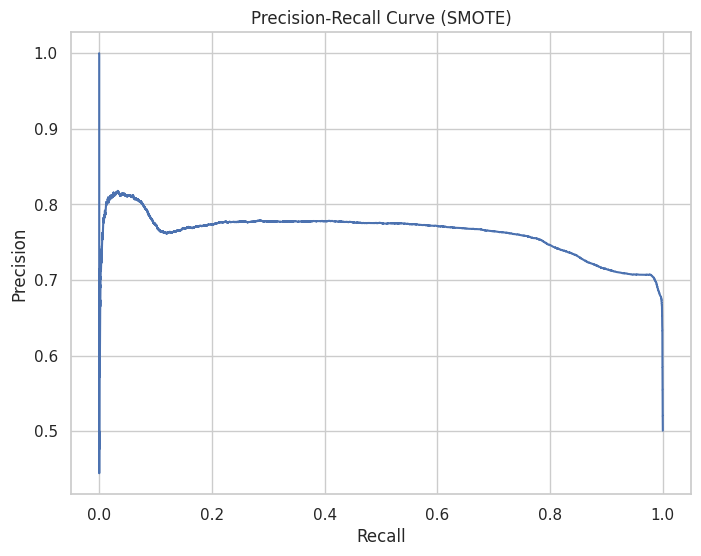

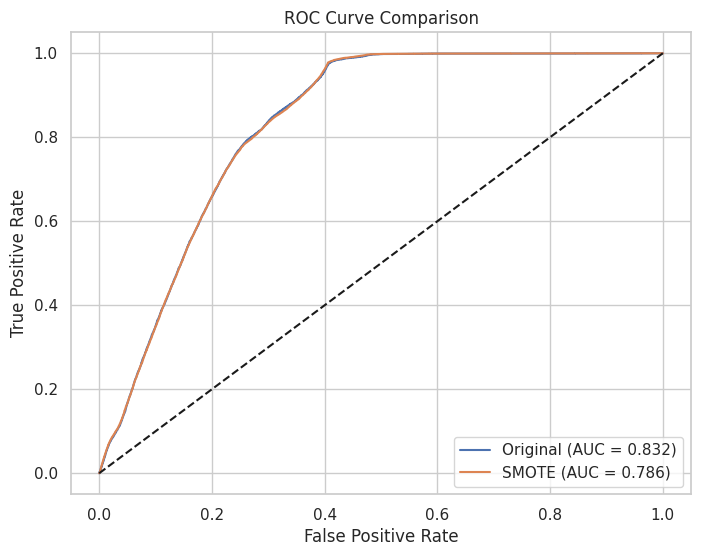

In [62]:
# Now let's create a new model with SMOTE
print("\n=== Model with SMOTE Balancing ===")
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the balanced dataset
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

# Train new model (without class_weight since we used SMOTE)
model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Evaluate SMOTE model
y_pred_smote = model_smote.predict(X_test_smote)
y_pred_proba_smote = model_smote.predict_proba(X_test_smote)[:, 1]

print("\nModel Performance with SMOTE:")
print(classification_report(y_test_smote, y_pred_smote))
print(f"ROC-AUC Score: {roc_auc_score(y_test_smote, y_pred_smote):.3f}")

# Confusion Matrix for SMOTE model
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SMOTE)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision-Recall Curve for SMOTE model
precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test_smote, y_pred_proba_smote)
plt.figure(figsize=(8, 6))
plt.plot(recall_smote, precision_smote, 'b-', label='Precision-Recall curve (SMOTE)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SMOTE)')
plt.grid(True)
plt.show()

# Compare ROC curves
from sklearn.metrics import roc_curve
plt.figure(figsize=(8, 6))

# Original model ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Original (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')

# SMOTE model ROC
fpr_smote, tpr_smote, _ = roc_curve(y_test_smote, y_pred_proba_smote)
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC = {roc_auc_score(y_test_smote, y_pred_smote):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


=== Model with Random Undersampling ===

Model Performance with Undersampling:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      9346
           1       0.71      0.98      0.82      9338

    accuracy                           0.79     18684
   macro avg       0.83      0.79      0.78     18684
weighted avg       0.83      0.79      0.78     18684

ROC-AUC Score: 0.785


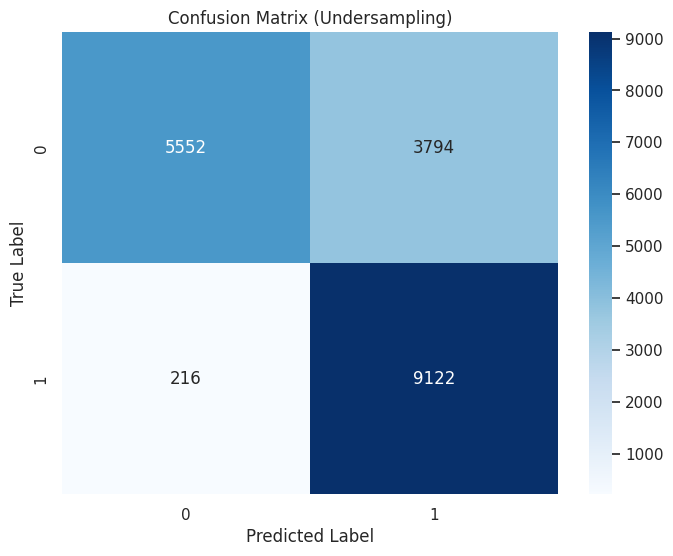

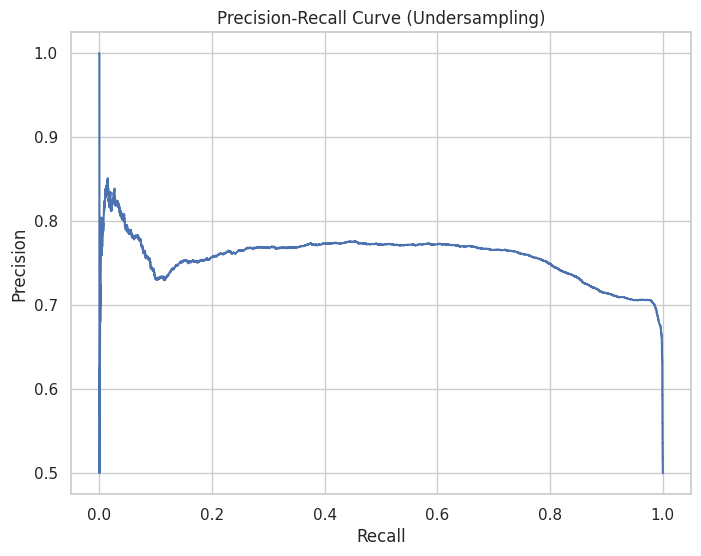

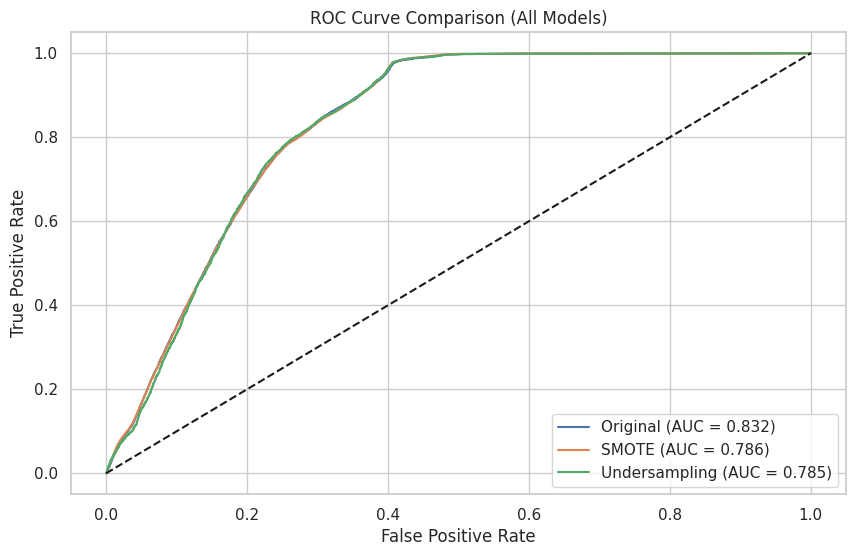

In [63]:
# Now let's create a model with Random Undersampling
print("\n=== Model with Random Undersampling ===")
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling to balance classes
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

# Split the undersampled dataset
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42
)

# Train new model with undersampled data
model_under = LogisticRegression(random_state=42, max_iter=1000)
model_under.fit(X_train_under, y_train_under)

# Evaluate undersampling model
y_pred_under = model_under.predict(X_test_under)
y_pred_proba_under = model_under.predict_proba(X_test_under)[:, 1]

print("\nModel Performance with Undersampling:")
print(classification_report(y_test_under, y_pred_under))
print(f"ROC-AUC Score: {roc_auc_score(y_test_under, y_pred_under):.3f}")

# Confusion Matrix for undersampled model
cm_under = confusion_matrix(y_test_under, y_pred_under)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_under, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Undersampling)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision-Recall Curve for undersampled model
precision_under, recall_under, thresholds_under = precision_recall_curve(y_test_under, y_pred_proba_under)
plt.figure(figsize=(8, 6))
plt.plot(recall_under, precision_under, 'b-', label='Precision-Recall curve (Undersampling)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Undersampling)')
plt.grid(True)
plt.show()

# Compare ROC curves for all three models
plt.figure(figsize=(10, 6))

# Original model ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Original (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')

# SMOTE model ROC
fpr_smote, tpr_smote, _ = roc_curve(y_test_smote, y_pred_proba_smote)
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC = {roc_auc_score(y_test_smote, y_pred_smote):.3f})')

# Undersampling model ROC
fpr_under, tpr_under, _ = roc_curve(y_test_under, y_pred_proba_under)
plt.plot(fpr_under, tpr_under, label=f'Undersampling (AUC = {roc_auc_score(y_test_under, y_pred_under):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (All Models)')
plt.legend()
plt.grid(True)
plt.show()